# Bike Sharing Dataset Analysis

In [2]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## EDA

In [3]:
# baca dataset
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [4]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
# ubah tipe data dteday menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# mengganti nilai numerik pada beberapa kolom di dataset (day_data dan hour_data) dengan label yang lebih mudah dipahami
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_data['season'] = day_data['season'].map(season_mapping)
hour_data['season'] = hour_data['season'].map(season_mapping)
day_data['weathersit'] = day_data['weathersit'].map(weather_mapping)
hour_data['weathersit'] = hour_data['weathersit'].map(weather_mapping)
day_data['weekday'] = day_data['weekday'].map(weekday_mapping)
hour_data['weekday'] = hour_data['weekday'].map(weekday_mapping)

# cek info dataset
day_data.info(), hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None, None)

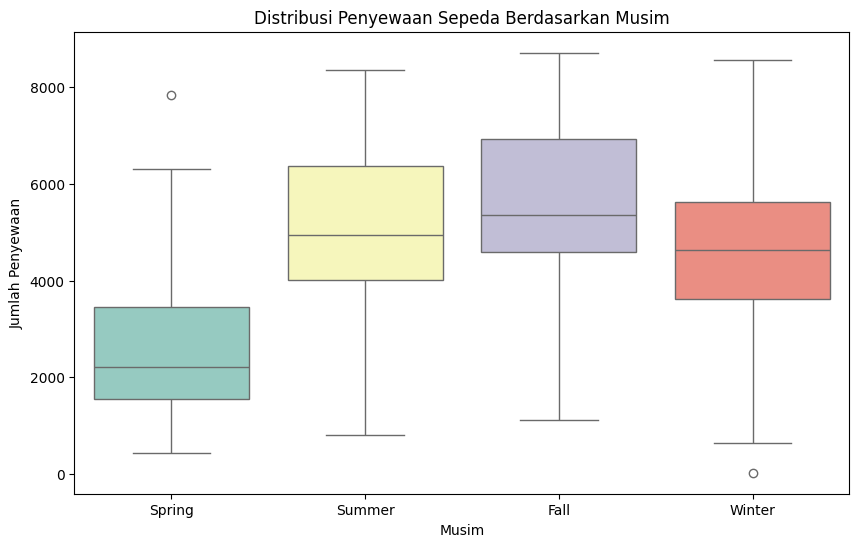

In [19]:
# 1. melihat distribusi penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='season', y='cnt', palette='Set3')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Musim')
plt.show()

Distribusi Penyewaan Berdasarkan Musim

Musim gugur (Fall) memiliki jumlah penyewaan tertinggi, sedangkan musim dingin (Winter) memiliki jumlah terendah. Hal ini kemungkinan dipengaruhi oleh cuaca dingin di musim dingin.

Lalu, terlihat pada musim semi (Spring) dan musim dingin (Winter) terdapat pencilan sehingga perlu dilakukan analisis lebih lanjut

In [20]:
# menghitung IQR untuk musim semi dan Winter
seasons = ['Spring', 'Winter']
outlier_info = {}

for season in seasons:
    # filter data berdasarkan musim
    season_data = day_data[day_data['season'] == season]
    
    # menghitung Q1, Q3 dan IQR
    Q1 = season_data['cnt'].quantile(0.25)
    Q3 = season_data['cnt'].quantile(0.75)
    IQR = Q3 - Q1
    
    # menentukan batas bawah dan atas untuk pencilan
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # menyaring data yang dianggap pencilan
    outliers = season_data[(season_data['cnt'] < lower_bound) | (season_data['cnt'] > upper_bound)]
    
    # menyimpan informasi pencilan
    outlier_info[season] = {
        'outliers_count': len(outliers),
        'outliers_percentage': (len(outliers) / len(season_data)) * 100,
        'outliers_data': outliers[['dteday', 'cnt']]
    }

# menampilkan hasil pencilan untuk masing-masing musim
outlier_info['Spring'], outlier_info['Winter']


({'outliers_count': 1,
  'outliers_percentage': 0.5524861878453038,
  'outliers_data':         dteday   cnt
  441 2012-03-17  7836},
 {'outliers_count': 1,
  'outliers_percentage': 0.5617977528089888,
  'outliers_data':         dteday  cnt
  667 2012-10-29   22})

1. Musim Semi:
    - Jumlah Pencilan: Terdapat 1 data pencilan pada musim semi.
    - Persentase Pencilan: Pencilan ini mewakili sekitar 0.55% dari total data musim semi.
    - Pencilan: Tanggal 17 Maret 2012 memiliki jumlah penyewaan sepeda yang sangat tinggi, yaitu 7836 unit, yang jelas jauh lebih tinggi dibandingkan dengan sebagian besar data pada musim tersebut. Ini bisa jadi merupakan akibat dari event besar atau kejadian khusus yang terjadi pada hari tersebut, seperti acara publik atau kondisi luar biasa yang meningkatkan permintaan sewa sepeda.

2. Musim Dingin:
    - Jumlah Pencilan: Terdapat 1 data pencilan pada musim Winter.
    - Persentase Pencilan: Pencilan ini mewakili sekitar 0.56% dari total data musim Winter.
    - Pencilan: Pada tanggal 29 Oktober 2012, hanya ada 22 penyewaan sepeda, angka yang sangat rendah untuk musim ini. Hal ini bisa jadi disebabkan oleh cuaca ekstrem atau kondisi yang tidak mendukung penggunaan sepeda, seperti hujan deras, salju, atau cuaca sangat dingin.

Sehingga dapat disimpulkan,
Pencilan yang terdeteksi pada kedua musim (Spring dan Winter) mewakili persentase yang sangat kecil dari data keseluruhan, yaitu kurang dari 1%.
Pencilan pada Spring mungkin mencerminkan suatu acara atau kejadian luar biasa, sementara pencilan pada Winter mungkin dipengaruhi oleh cuaca buruk atau kondisi lain yang menghambat penyewaan sepeda.

Tidak diperlukan penghapusan pencilan karena,
Pencilan ini hanya mempengaruhi sebagian kecil data.
Bisa jadi pencilan tersebut merupakan bagian dari peristiwa yang relevan untuk analisis, seperti event atau cuaca ekstrem, yang seharusnya tetap dipertimbangkan.

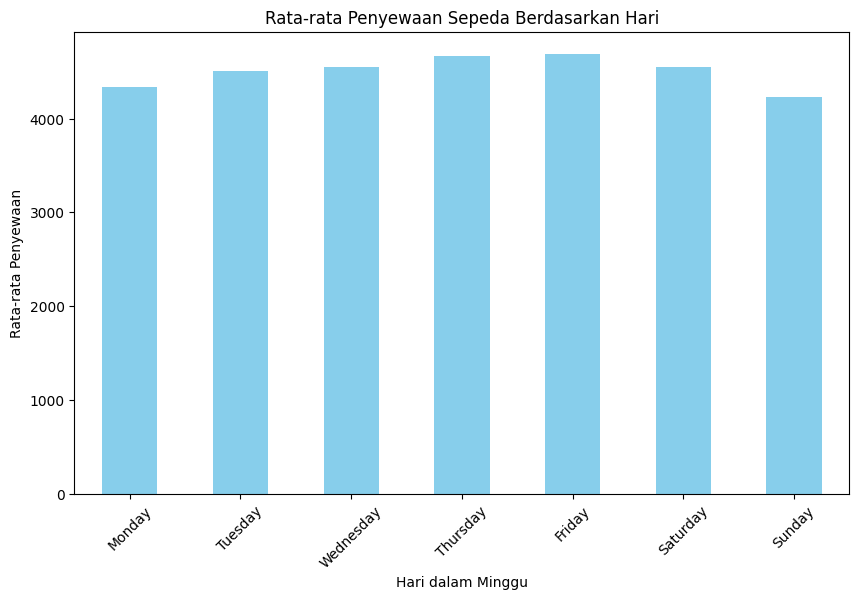

In [21]:
# 2. melihat pola penyewaan harian (mingguan)
plt.figure(figsize=(10, 6))
weekday_counts = day_data.groupby('weekday')['cnt'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Hari dalam Minggu')
plt.xticks(rotation=45)
plt.show()

Pola Penyewaan Harian

Penyewaan meningkat pada akhir pekan (Sabtu dan Minggu), menunjukkan aktivitas rekreasi lebih banyak dibandingkan perjalanan kerja.

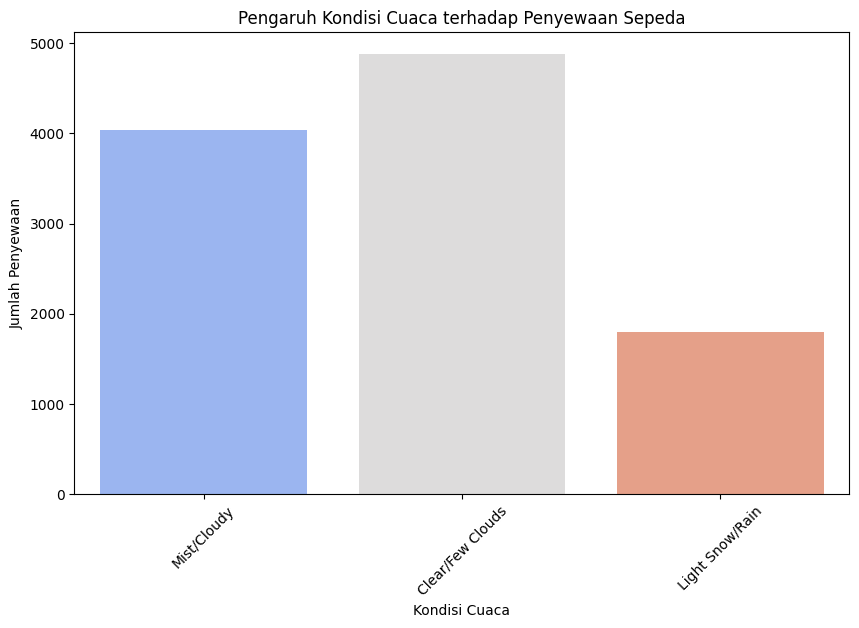

In [22]:
# 3. melihat pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_data, x='weathersit', y='cnt', palette='coolwarm', ci=None)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.xticks(rotation=45)
plt.show()

Pengaruh Cuaca terhadap Penyewaan

Kondisi cuaca cerah atau sedikit berawan menghasilkan penyewaan tertinggi. Kondisi hujan lebat dan salju menurunkan penyewaan secara signifikan.

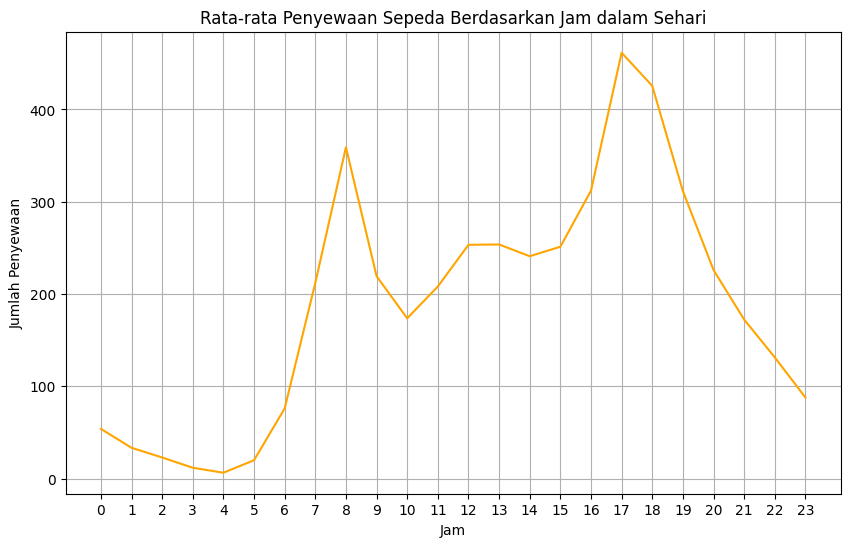

In [23]:
# 4. distribusi penyewaan berdasarkan jam dalam sehari
hourly_avg = hour_data.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
hourly_avg.plot(color='orange')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Jam')
plt.grid()
plt.xticks(range(0, 24))
plt.show()

Distribusi Penyewaan Berdasarkan Jam:

Puncak penyewaan terjadi pada pukul 08.00 (jam kerja) dan 17.00–18.00 (jam pulang kerja), menunjukkan penggunaan sepeda sebagai transportasi harian.

## RFM & Clustering

Analisis RFM untuk data harian (Recency, Frequency, Monetary)
- Recency = Hari terakhir dari data untuk setiap pelanggan
- Frequency = Jumlah hari penggunaan sepeda
- Monetary = Total penyewaan sepeda

In [24]:
# mengelompokkan data berdasarkan bulan untuk menyimulasikan perilaku RFM
rfm_data = day_data.groupby('mnth').agg(
    recency=('dteday', lambda x: (day_data['dteday'].max() - x.max()).days),
    frequency=('cnt', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

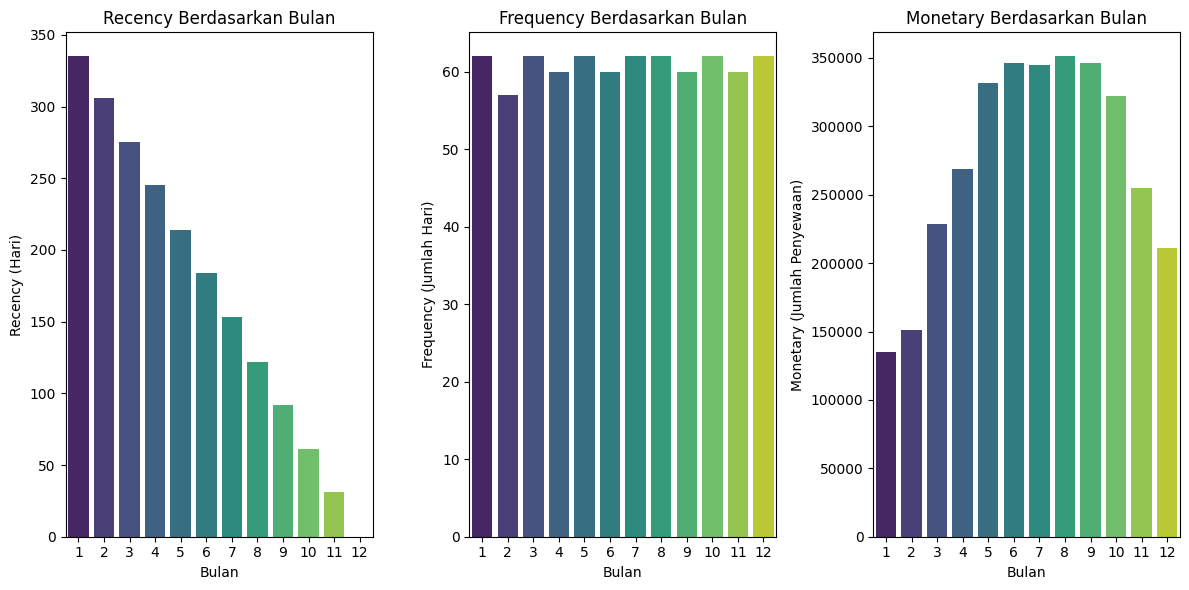

In [ ]:
# melakukan visualisasi RFM
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=rfm_data, x='mnth', y='recency', palette='viridis')
plt.title('Recency Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Recency (Hari)')

plt.subplot(1, 3, 2)
sns.barplot(data=rfm_data, x='mnth', y='frequency', palette='viridis')
plt.title('Frequency Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frequency (Jumlah Hari)')

plt.subplot(1, 3, 3)
sns.barplot(data=rfm_data, x='mnth', y='monetary', palette='viridis')
plt.title('Monetary Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Monetary (Jumlah Penyewaan)')

plt.tight_layout()
plt.show()

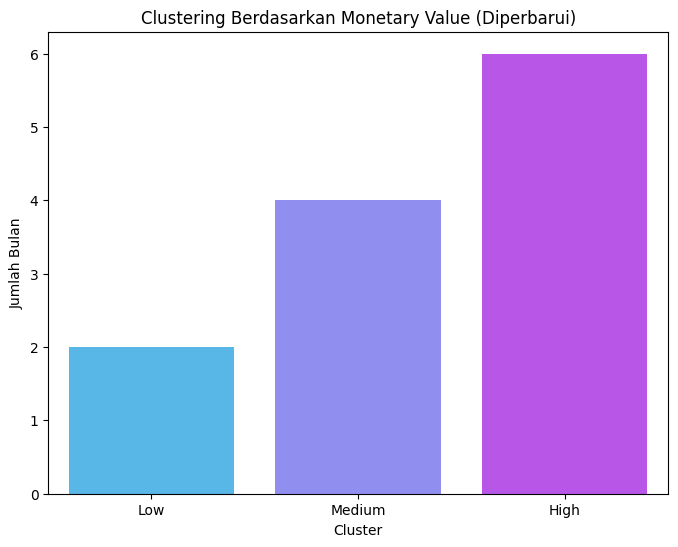

,mnth,recency,frequency,monetary,monetary_cluster
0,1,335,62,134933,Low
1,2,306,57,151352,Low
2,3,275,62,228920,Medium
3,4,245,60,269094,Medium
4,5,214,62,331686,High
5,6,184,60,346342,High
6,7,153,62,344948,High
7,8,122,62,351194,High
8,9,92,60,345991,High
9,10,61,62,322352,High


In [26]:
# analisis rentang monetary
monetary_min = rfm_data['monetary'].min()
monetary_max = rfm_data['monetary'].max()

# menentukan batas bins berdasarkan rentang data
bins = [0, 200000, 300000, monetary_max + 1]  # disesuaikan agar mencakup maksimum
labels = ['Low', 'Medium', 'High']
rfm_data['monetary_cluster'] = pd.cut(rfm_data['monetary'], bins=bins, labels=labels)

# melakukan visualisasi clustering
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm_data, x='monetary_cluster', palette='cool')
plt.title('Clustering Berdasarkan Monetary Value (Diperbarui)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Bulan')
plt.show()

# menampilkan data RFM dengan cluster
rfm_data

Hasil clustering yang diperbarui menunjukkan distribusi data yang sesuai:

- Cluster "Low":

    Termasuk bulan Januari dan Februari, dengan total penyewaan yang relatif rendah dibandingkan bulan lain.

- Cluster "Medium":

    Termasuk bulan Maret, April, November, dan Desember. Bulan-bulan ini memiliki total penyewaan sedang.

- Cluster "High":

    Termasuk bulan Mei hingga Oktober. Ini adalah bulan dengan total penyewaan tertinggi, mencerminkan penggunaan sepeda yang lebih tinggi selama musim panas dan gugur.